In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv("carprice_original.csv")
profile = ProfileReport(df, title="Profiling Report")

In [3]:
# profile.to_notebook_iframe()

In [4]:
# profile.to_html()

In [5]:
# profile.to_file('prix_voiture_report.html')

In [6]:
# profile.to_widgets()

In [7]:

# Load CSV file into a DataFrame
df = pd.read_csv('carprice_original.csv')
# set the maximum number of columns to be displayed to None
pd.set_option("display.max_columns", None)

# Display the first 5 rows of the Data
print(df.head(5))

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  engi

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Pour séparer la colonne nommée "symboling" en deux colonnes distinctes nommées "marque" et "modèle
df[['marque', 'modèle']] = df['CarName'].str.split(' ', 1, expand=True)

df.drop('CarName', axis=1, inplace=True)

df.to_csv('prix_voiture.csv', index=False)

/tmp/ipykernel_22471/3617452879.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['marque', 'modèle']] = df['CarName'].str.split(' ', 1, expand=True)


#### Pour nettoyer et modifier votre fichier CSV pour qu'il soit conforme aux normes françaises:

In [10]:

# Modifier les valeurs de la colonne "fueltype"
df["fueltype"] = df["fueltype"].replace({"gas": "essence", "diesel": "diesel"})

# Modifier les valeurs de la colonne "aspiration"
df["aspiration"] = df["aspiration"].replace({"std": "atmosphérique", "turbo": "turbo"})

# Modifier les valeurs de la colonne "doornumber"
df["doornumber"] = df["doornumber"].replace({"two": "deux", "four": "quatre"})

# Modifier les valeurs de la colonne "carbody"
df["carbody"] = df["carbody"].replace({"hatchback": "berline compacte", "sedan": "berline", "wagon": "break"})

# Modifier les valeurs de la colonne "drivewheel"
df["drivewheel"] = df["drivewheel"].replace({"rwd": "propulsion", "fwd": "traction", "4wd": "quatre roues motrices"})

# Modifier les valeurs de la colonne "enginelocation"
df["enginelocation"] = df["enginelocation"].replace({"front": "avant", "rear": "arrière"})

# Renommer les colonnes "carlength", "carwidth" et "carheight"
df = df.rename(columns={"carlength": "longueur", "carwidth": "largeur", "carheight": "hauteur"})
#######################################################

df = df.rename(columns={'car_ID': 'identifiant', 'symboling': 'etat_de_route', 'fueltype': 'carburant', 'aspiration': 'turbo', 'doornumber': 'nombre_portes', 'carbody': 'type_vehicule', 'drivewheel': 'roues_motrices', 'enginelocation': 'emplacement_moteur', 'wheelbase': 'empattement', 'carlength': 'longueur_voiture', 'carwidth': 'largeur_voiture', 'carheight': 'hauteur_voiture', 'curbweight': 'poids_vehicule', 'enginetype': 'type_moteur', 'cylindernumber': 'nombre_cylindres', 'enginesize': 'taille_moteur', 'fuelsystem': 'systeme_carburant', 'boreratio': 'taux_alésage', 'stroke': 'course', 'compressionratio': 'taux_compression', 'horsepower': 'chevaux', 'peakrpm': 'tour_moteur', 'citympg': 'consommation_ville', 'highwaympg': 'consommation_autoroute', 'price': 'prix'})

df.to_csv('prix_voiture.csv', index=False)


In [11]:
# enleve la colonne car_id
df = df.drop('identifiant', axis=1)

#### Il y a 2 valeurs null dans la colonne "modèle". On supprime ces deux lignes.

In [12]:
df = df.dropna()

# display the resulting DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   etat_de_route           203 non-null    int64  
 1   carburant               203 non-null    object 
 2   turbo                   203 non-null    object 
 3   nombre_portes           203 non-null    object 
 4   type_vehicule           203 non-null    object 
 5   roues_motrices          203 non-null    object 
 6   emplacement_moteur      203 non-null    object 
 7   empattement             203 non-null    float64
 8   longueur                203 non-null    float64
 9   largeur                 203 non-null    float64
 10  hauteur                 203 non-null    float64
 11  poids_vehicule          203 non-null    int64  
 12  type_moteur             203 non-null    object 
 13  nombre_cylindres        203 non-null    object 
 14  taille_moteur           203 non-null    in

In [13]:
df.describe()

,etat_de_route,empattement,longueur,largeur,hauteur,poids_vehicule,taille_moteur,taux_alésage,course,taux_compression,chevaux,tour_moteur,consommation_ville,consommation_autoroute,prix
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.832512,98.789163,174.143842,65.922660,53.731034,2560.078818,127.147783,3.326897,3.262857,10.15133,104.399015,5127.832512,25.157635,30.694581,13347.200330
std,1.247384,6.039964,12.338152,2.148216,2.454068,521.221484,41.773527,0.270629,0.305642,3.99058,39.631013,478.525201,6.544197,6.896356,7995.739861
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.00000,48.000000,4150.000000,13.000000,16.000000,5151.000000
25%,0.000000,94.500000,166.550000,64.100000,52.000000,2179.500000,97.500000,3.150000,3.110000,8.55000,70.000000,4800.000000,19.000000,25.000000,7847.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.00000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,2.000000,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,3.580000,3.410000,9.40000,116.000000,5500.000000,30.000000,34.000000,16509.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.00000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
# df = pd.read_csv("prix_voiture.csv")
profile = ProfileReport(df, title="Profiling Report")
profile.to_file('prix_voiture_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# Selectionner les colonnes numeriques
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
numeric_cols

Index(['etat_de_route', 'empattement', 'longueur', 'largeur', 'hauteur',
       'poids_vehicule', 'taille_moteur', 'taux_alésage', 'course',
       'taux_compression', 'chevaux', 'tour_moteur', 'consommation_ville',
       'consommation_autoroute', 'prix'],
      dtype='object')

In [16]:
# Conversion des unités américaines en unités françaises
df['empattement'] = (df['empattement'] * 0.0254).round(2)
df['longueur'] = df['longueur'] * 0.0254
df['largeur'] = df['largeur'] * 0.0254
df['hauteur'] = df['hauteur'] * 0.0254
df['poids_vehicule'] = df['poids_vehicule'] * 0.453592
df['taille_moteur'] = df['taille_moteur'] * 0.0163871
df['taux_alésage'] = df['taux_alésage'] * 25.4
df['course'] = df['course'] * 25.4
df['consommation_ville'] = 235.214 / df['consommation_ville']
df['consommation_autoroute'] = 235.214 / df['consommation_autoroute']

df.to_csv('prix_voiture.csv', index=False)

# Afficher les premières lignes du DataFrame pour vérifier les modifications
print(df.head())


   etat_de_route carburant          turbo nombre_portes     type_vehicule  \
0              3   essence  atmosphérique          deux       convertible   
1              3   essence  atmosphérique          deux       convertible   
2              1   essence  atmosphérique          deux  berline compacte   
3              2   essence  atmosphérique        quatre           berline   
4              2   essence  atmosphérique        quatre           berline   

          roues_motrices emplacement_moteur  empattement  longueur  largeur  \
0             propulsion              avant         2.25   4.28752  1.62814   
1             propulsion              avant         2.25   4.28752  1.62814   
2             propulsion              avant         2.40   4.34848  1.66370   
3               traction              avant         2.53   4.48564  1.68148   
4  quatre roues motrices              avant         2.52   4.48564  1.68656   

   hauteur  poids_vehicule type_moteur nombre_cylindres  taill

In [17]:
df.describe()

,etat_de_route,empattement,longueur,largeur,hauteur,poids_vehicule,taille_moteur,taux_alésage,course,taux_compression,chevaux,tour_moteur,consommation_ville,consommation_autoroute,prix
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.832512,2.508916,4.423254,1.674436,1.364768,1161.231271,2.083583,84.503172,82.876571,10.15133,104.399015,5127.832512,9.983114,8.057390,13347.200330
std,1.247384,0.153258,0.313389,0.054565,0.062333,236.421895,0.684547,6.873989,7.763307,3.99058,39.631013,478.525201,2.576138,1.853730,7995.739861
min,-2.000000,2.200000,3.583940,1.531620,1.214120,674.944896,0.999613,64.516000,52.578000,7.00000,48.000000,4150.000000,4.800286,4.355815,5151.000000
25%,0.000000,2.400000,4.230370,1.628140,1.320800,988.603764,1.597742,80.010000,78.994000,8.55000,70.000000,4800.000000,7.840467,6.918059,7847.000000
50%,1.000000,2.460000,4.399280,1.663700,1.374140,1097.692640,1.966452,84.074000,83.566000,9.00000,95.000000,5200.000000,9.800583,7.840467,10345.000000
75%,2.000000,2.600000,4.655820,1.699260,1.409700,1335.148052,2.343355,90.932000,86.614000,9.40000,116.000000,5500.000000,12.379684,9.408560,16509.000000
max,3.000000,3.070000,5.285740,1.836420,1.518920,1844.305072,5.342195,100.076000,105.918000,23.00000,288.000000,6600.000000,18.093385,14.700875,45400.000000


In [18]:
df.isnull().sum()

etat_de_route             0
carburant                 0
turbo                     0
nombre_portes             0
type_vehicule             0
roues_motrices            0
emplacement_moteur        0
empattement               0
longueur                  0
largeur                   0
hauteur                   0
poids_vehicule            0
type_moteur               0
nombre_cylindres          0
taille_moteur             0
systeme_carburant         0
taux_alésage              0
course                    0
taux_compression          0
chevaux                   0
tour_moteur               0
consommation_ville        0
consommation_autoroute    0
prix                      0
marque                    0
modèle                    0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df['marque'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [21]:
df["marque"] = df["marque"].replace({"porcshce": "porsche", "toyouta": "toyota", "vokswagen": "volkswagen", "maxda": "mazda", "Nissan": "nissan"})


In [22]:
df['marque'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [23]:
df['modèle'].unique()


array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [24]:
df['tour_moteur'].unique()


array([5000, 5500, 5800, 4250, 5400, 5100, 4800, 6000, 4750, 4650, 4200,
       4350, 4500, 5200, 4150, 5600, 5900, 5750, 5250, 4400, 6600, 5300])

In [25]:
df["modèle"] = df["modèle"].replace({"100 ls": "100ls"})
df


,etat_de_route,carburant,turbo,nombre_portes,type_vehicule,roues_motrices,emplacement_moteur,empattement,longueur,largeur,hauteur,poids_vehicule,type_moteur,nombre_cylindres,taille_moteur,systeme_carburant,taux_alésage,course,taux_compression,chevaux,tour_moteur,consommation_ville,consommation_autoroute,prix,marque,modèle
0,3,essence,atmosphérique,deux,convertible,propulsion,avant,2.25,4.28752,1.62814,1.23952,1155.752416,dohc,four,2.130323,mpfi,88.138,68.072,9.0,111,5000,11.200667,8.711630,13495.0,alfa-romero,giulia
1,3,essence,atmosphérique,deux,convertible,propulsion,avant,2.25,4.28752,1.62814,1.23952,1155.752416,dohc,four,2.130323,mpfi,88.138,68.072,9.0,111,5000,11.200667,8.711630,16500.0,alfa-romero,stelvio
2,1,essence,atmosphérique,deux,berline compacte,propulsion,avant,2.40,4.34848,1.66370,1.33096,1280.490216,ohcv,six,2.490839,mpfi,68.072,88.138,9.0,154,5000,12.379684,9.046692,16500.0,alfa-romero,Quadrifoglio
3,2,essence,atmosphérique,quatre,berline,traction,avant,2.53,4.48564,1.68148,1.37922,1060.044504,ohc,four,1.786194,mpfi,81.026,86.360,10.0,102,5500,9.800583,7.840467,13950.0,audi,100ls
4,2,essence,atmosphérique,quatre,berline,quatre roues motrices,avant,2.52,4.48564,1.68656,1.37922,1280.943808,ohc,five,2.228646,mpfi,81.026,86.360,8.0,115,5500,13.067444,10.691545,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,essence,atmosphérique,quatre,berline,propulsion,avant,2.77,4.79552,1.75006,1.40970,1339.003584,ohc,four,2.310581,mpfi,96.012,80.010,9.5,114,5400,10.226696,8.400500,16845.0,volvo,145e (sw)
201,-1,essence,turbo,quatre,berline,propulsion,avant,2.77,4.79552,1.74752,1.40970,1383.002008,ohc,four,2.310581,mpfi,96.012,80.010,8.7,160,5300,12.379684,9.408560,19045.0,volvo,144ea
202,-1,essence,atmosphérique,quatre,berline,propulsion,avant,2.77,4.79552,1.75006,1.40970,1366.219104,ohcv,six,2.834968,mpfi,90.932,72.898,8.8,134,5500,13.067444,10.226696,21485.0,volvo,244dl
203,-1,diesel,turbo,quatre,berline,propulsion,avant,2.77,4.79552,1.75006,1.40970,1459.205464,ohc,six,2.376130,idi,76.454,86.360,23.0,106,4800,9.046692,8.711630,22470.0,volvo,246


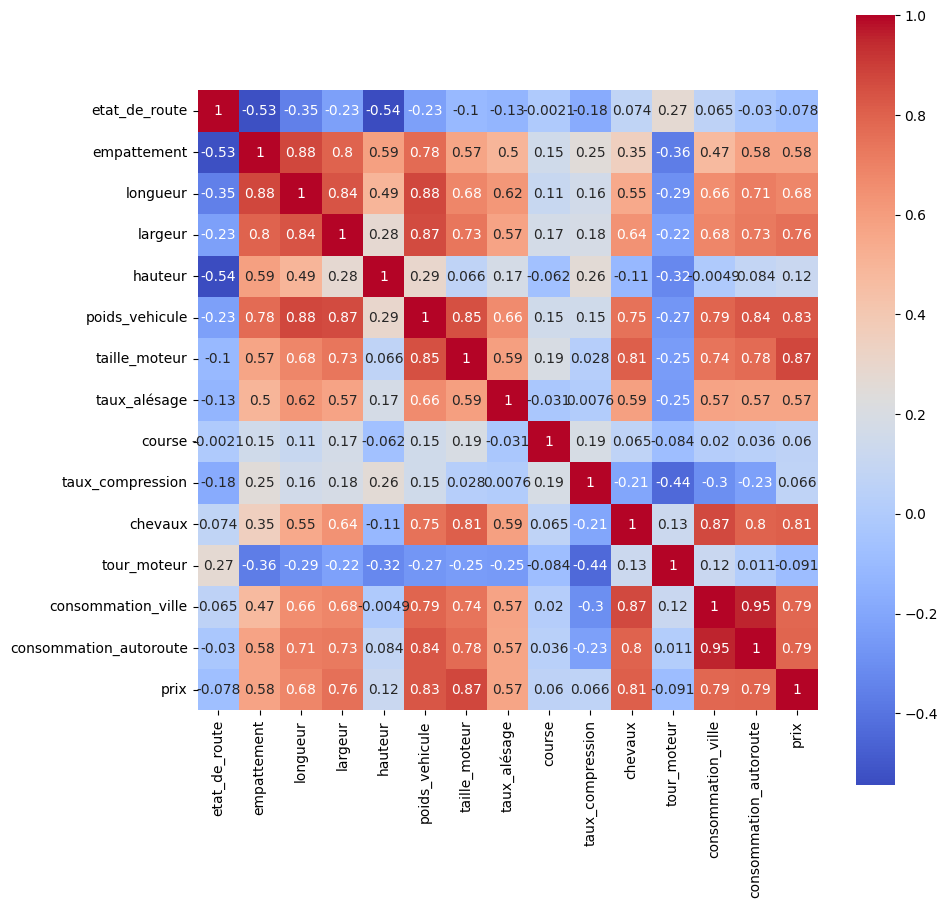

/tmp/ipykernel_22471/3673533471.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,etat_de_route,empattement,longueur,largeur,hauteur,poids_vehicule,taille_moteur,taux_alésage,course,taux_compression,chevaux,tour_moteur,consommation_ville,consommation_autoroute,prix
etat_de_route,1.000000,-0.529742,-0.354634,-0.229876,-0.544743,-0.227432,-0.104503,-0.132650,-0.002115,-0.178352,0.073560,0.274903,0.064587,-0.029634,-0.078380
empattement,-0.529742,1.000000,0.875704,0.795118,0.588219,0.776685,0.567752,0.499073,0.153479,0.247272,0.351404,-0.364372,0.472851,0.577252,0.575295
longueur,-0.354634,0.875704,1.000000,0.839916,0.493226,0.878048,0.682573,0.621244,0.112209,0.157108,0.550222,-0.292972,0.658227,0.711305,0.681318
largeur,-0.229876,0.795118,0.839916,1.000000,0.279709,0.866894,0.734644,0.571867,0.169840,0.179959,0.638929,-0.224719,0.681889,0.727502,0.758250
hauteur,-0.544743,0.588219,0.493226,0.279709,1.000000,0.294890,0.066142,0.174889,-0.062245,0.261029,-0.110609,-0.322873,-0.004917,0.083956,0.117922
poids_vehicule,-0.227432,0.776685,0.878048,0.866894,0.294890,1.000000,0.850183,0.664162,0.152585,0.149970,0.749232,-0.272694,0.790257,0.835595,0.833997
taille_moteur,-0.104503,0.567752,0.682573,0.734644,0.066142,0.850183,1.000000,0.594438,0.194784,0.027643,0.809006,-0.248738,0.744185,0.776390,0.873886
taux_alésage,-0.132650,0.499073,0.621244,0.571867,0.174889,0.664162,0.594438,1.000000,-0.031475,0.007627,0.586288,-0.250710,0.572150,0.566423,0.568206
course,-0.002115,0.153479,0.112209,0.169840,-0.062245,0.152585,0.194784,-0.031475,1.000000,0.186137,0.065097,-0.083931,0.020361,0.036273,0.059565
taux_compression,-0.178352,0.247272,0.157108,0.179959,0.261029,0.149970,0.027643,0.007627,0.186137,1.000000,-0.206657,-0.437822,-0.300563,-0.226197,0.066200


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Calcul de la matrice de corrélation
corr_matrix = df.corr(numeric_only=True)
# Création de la heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Affichage de la heatmap
plt.show()
df.corr()

In [27]:
df.to_csv('prix_voiture.csv', index=False)
